# Tugas Handson 1 Multimedia

## Soal Nomor 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import wave
import librosa
import librosa.display

Audio 1 (Suara Pelan)

In [2]:
file_path = os.path.join(os.getcwd(), 'audio', 'Audio1.wav')

In [3]:
with wave.open(file_path, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_data = np.frombuffer(frames, dtype='int16')
    sampling_rate = wav_file.getframerate()
    panjang_audio_sampel = len(sound_data)
    panjang_audio_detik = panjang_audio_sampel / sampling_rate

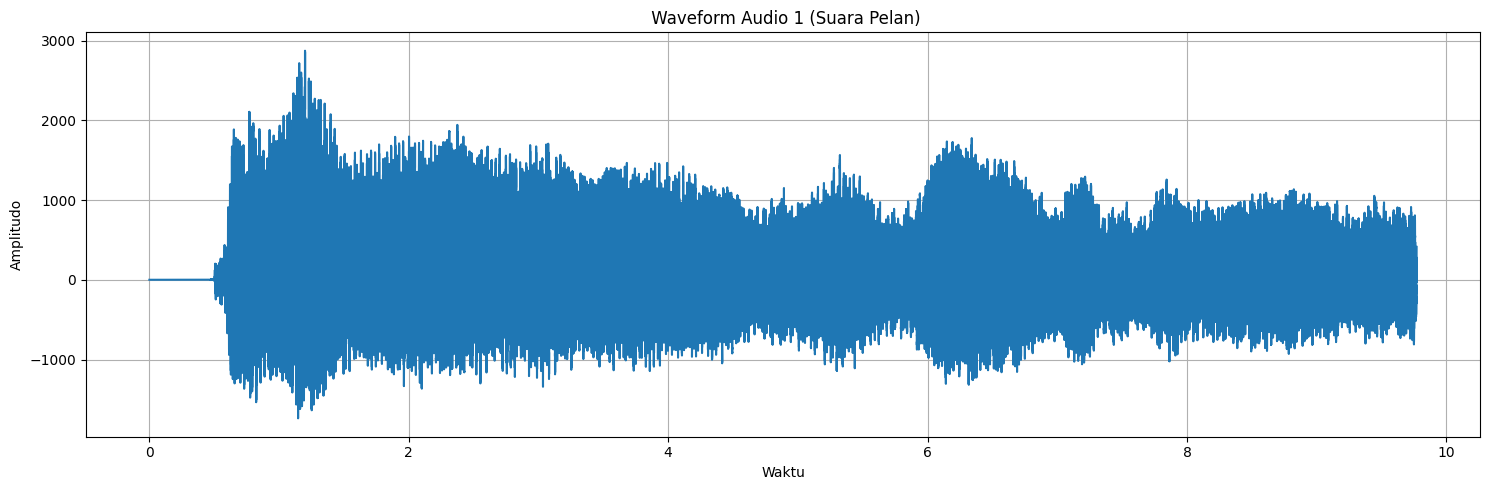

In [4]:
time_axis = np.linspace(0, panjang_audio_detik, panjang_audio_sampel)
plt.figure(figsize=(15, 5))
plt.plot(time_axis, sound_data)
plt.title(" Waveform Audio 1 (Suara Pelan)")
plt.xlabel("Waktu")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.tight_layout()
plt.show()

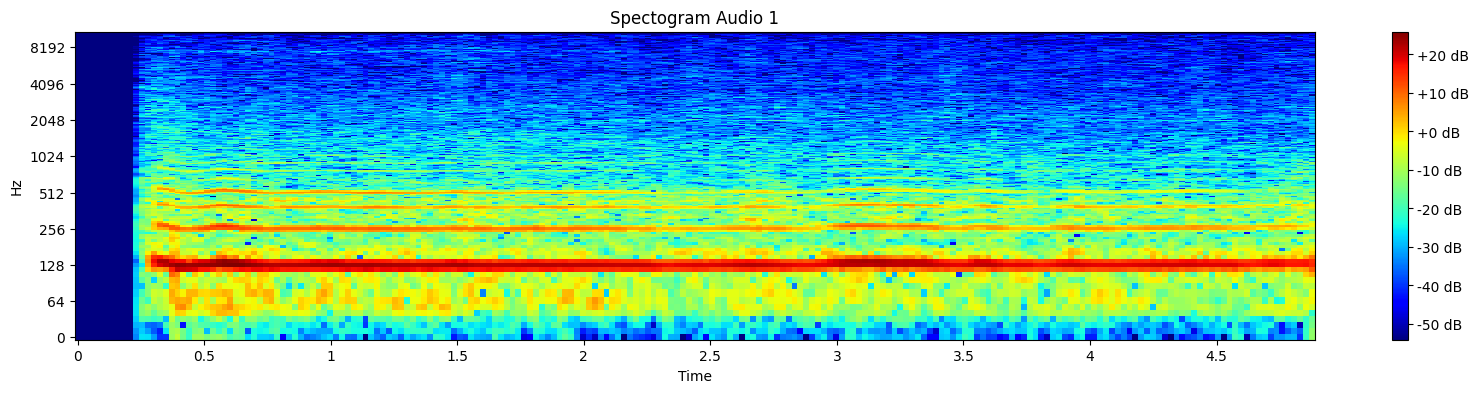

In [5]:
data_audio, sr = librosa.load(file_path)
S = librosa.stft(data_audio)
S_db = librosa.amplitude_to_db(np.abs(S))

plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectogram Audio 1")
plt.show()

Analisa Perbedaan Visualisasi Audio 1

1. Untuk visualisasi waveform pada audio 1 terlihat puncak amplitudo yang didapat sekitar 2900 Hz, artinya terdapat suara yang sedikit meninggi pada detik-detik awal

2. Pada visualisasi spectogram dapat dilihat untuk intensitas suara atau dB sangat merata, artinya suara tersebut konsisten

Audio 2 (Suara Sedang)

In [6]:
file_path = os.path.join(os.getcwd(), 'audio', 'Audio2.wav')

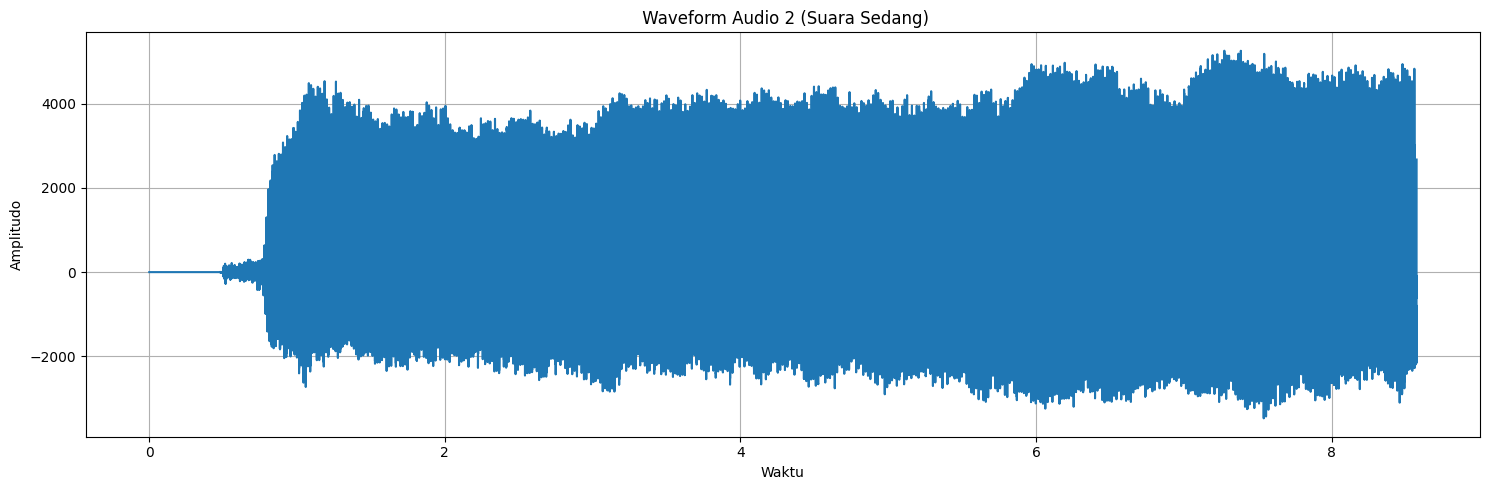

In [7]:
with wave.open(file_path, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_data = np.frombuffer(frames, dtype='int16')
    sampling_rate = wav_file.getframerate()
    panjang_audio_sampel = len(sound_data)
    panjang_audio_detik = panjang_audio_sampel / sampling_rate

time_axis = np.linspace(0, panjang_audio_detik, panjang_audio_sampel)
plt.figure(figsize=(15, 5))
plt.plot(time_axis, sound_data)
plt.title(" Waveform Audio 2 (Suara Sedang)")
plt.xlabel("Waktu")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.tight_layout()
plt.show()

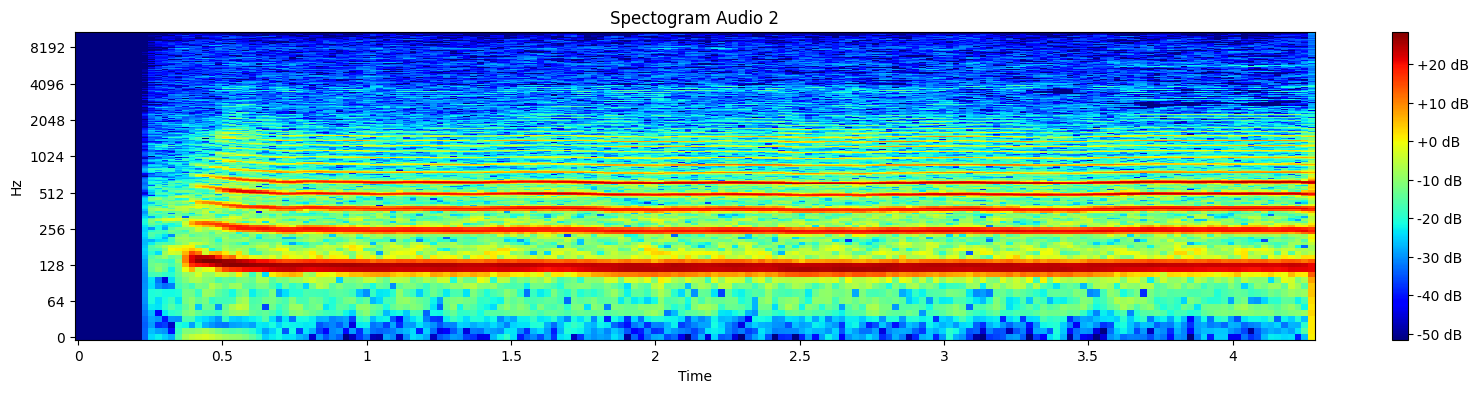

In [8]:
data_audio, sr = librosa.load(file_path)
S = librosa.stft(data_audio)
S_db = librosa.amplitude_to_db(np.abs(S))

plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectogram Audio 2")
plt.show()

Analisa Perbedaan Visualisasi Audio 2

1. Untuk visualisasi waveform pada audio 2 terlihat puncak amplitudo yang didapat sekitar 5000-an Hz dan itu meningkat dari rendah ke tinggi, artinya terjadi peningkatan suara secara perlahan

2. Pada visualisasi spectogram dapat dilihat untuk intensitas suara atau dB sangat merata walaupun terpotong-terpotong

Audio 3 (Suara Keras)

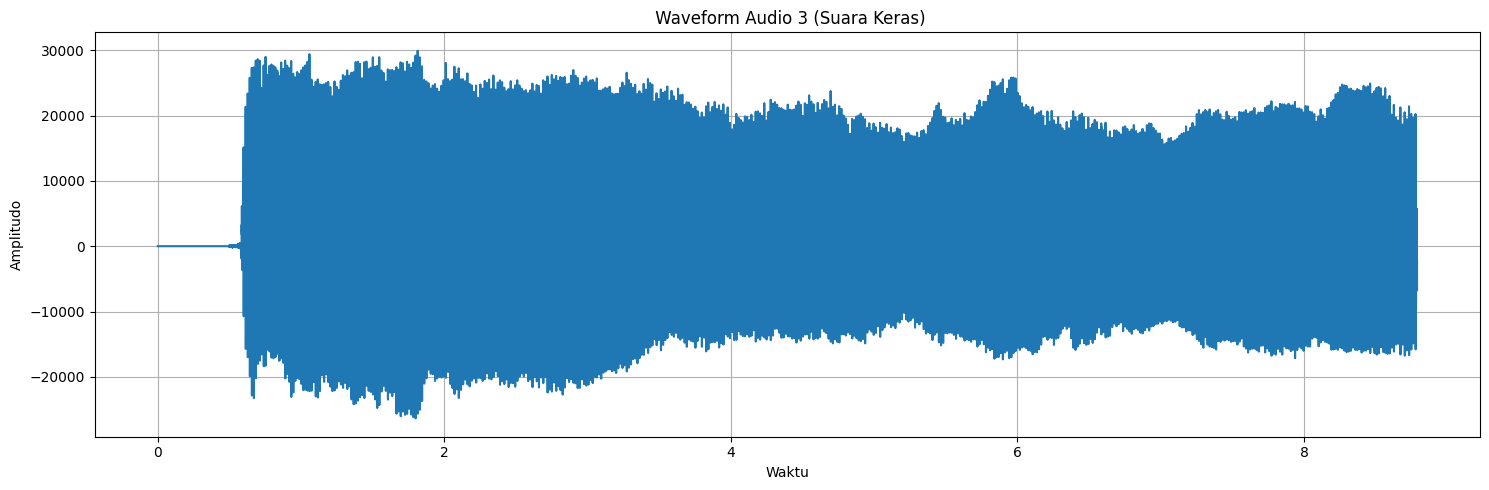

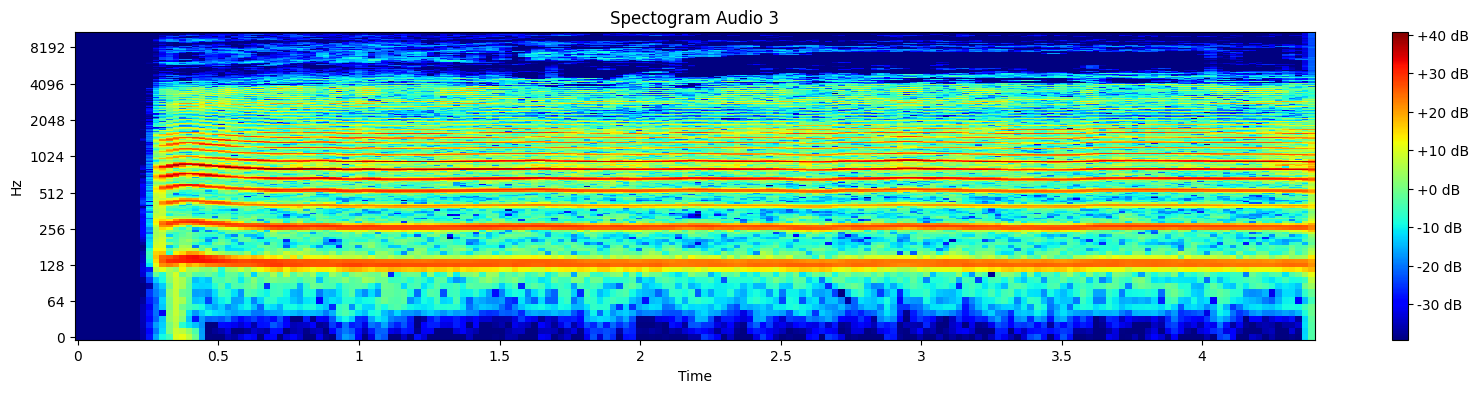

In [9]:
file_path = os.path.join(os.getcwd(), 'audio', 'Audio3.wav')

with wave.open(file_path, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_data = np.frombuffer(frames, dtype='int16')
    sampling_rate = wav_file.getframerate()
    panjang_audio_sampel = len(sound_data)
    panjang_audio_detik = panjang_audio_sampel / sampling_rate

time_axis = np.linspace(0, panjang_audio_detik, panjang_audio_sampel)
plt.figure(figsize=(15, 5))
plt.plot(time_axis, sound_data)
plt.title(" Waveform Audio 3 (Suara Keras)")
plt.xlabel("Waktu")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.tight_layout()
plt.show()

data_audio, sr = librosa.load(file_path)
S = librosa.stft(data_audio)
S_db = librosa.amplitude_to_db(np.abs(S))

plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectogram Audio 3")
plt.show()

Analisa Perbedaan Visualisasi Audio 3

1. Untuk visualisasi waveform pada audio 3 terlihat puncak amplitudo yang didapat sekitar 29000-an Hz dan terlihat suara menurun yang dari awalnya keras perlahan mulai pelan tapi tidak sepelan audio 1 dan 2

2. Pada visualisasi spectogram dapat dilihat untuk intensitas suara atau dB pada awal-awal suara sangat kuat hingga 40dB, tetapi perlahan semakin menurun

Audio 4 (Suara sedang mengucapkan essss)

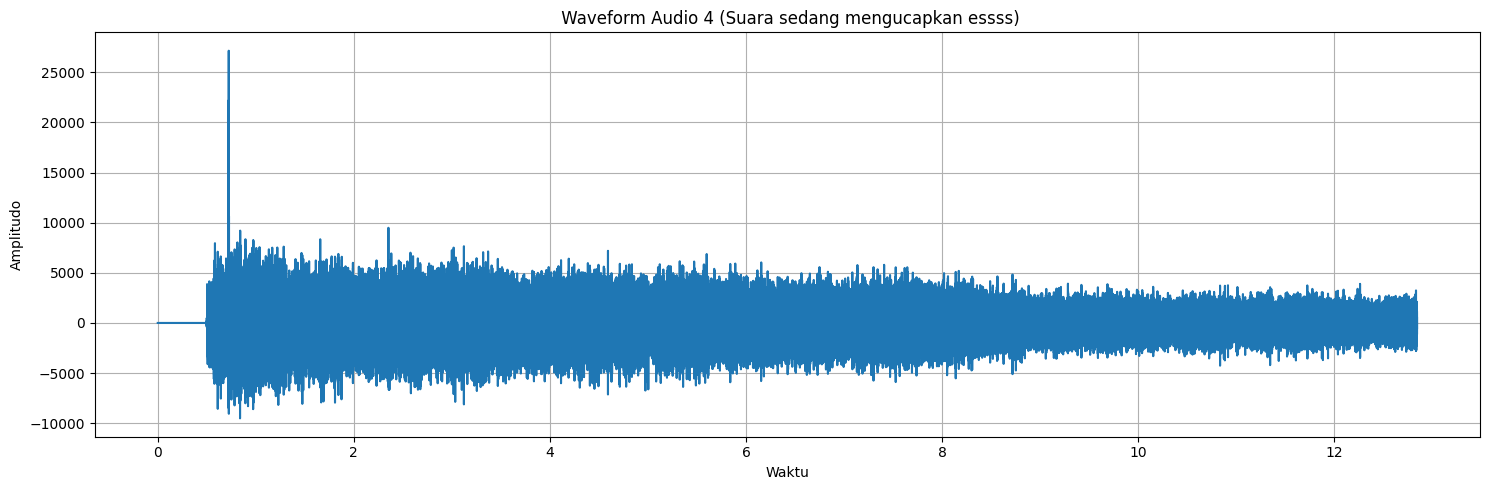

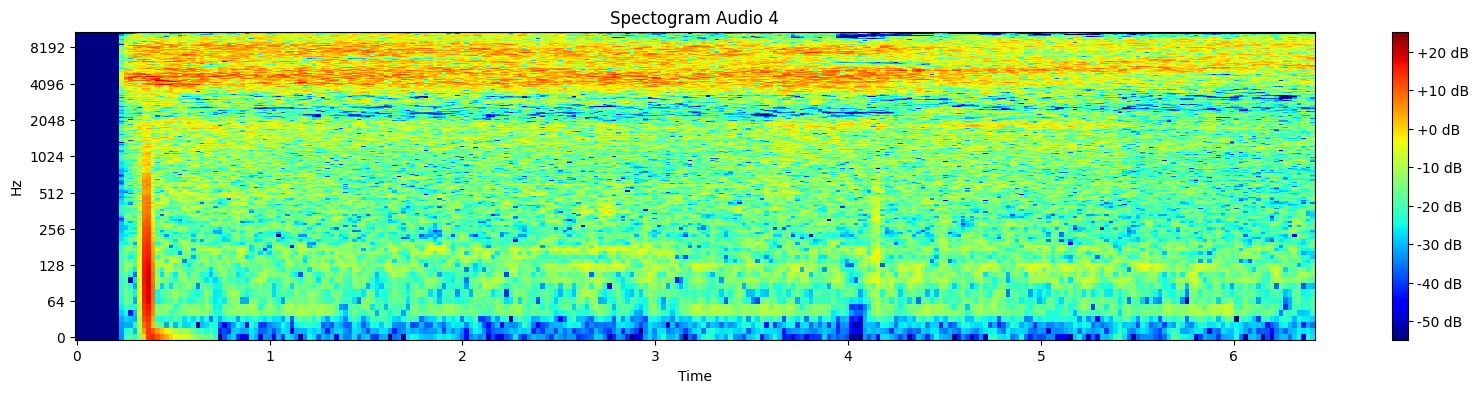

In [10]:
file_path = os.path.join(os.getcwd(), 'audio', 'Audio4.wav')

with wave.open(file_path, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_data = np.frombuffer(frames, dtype='int16')
    sampling_rate = wav_file.getframerate()
    panjang_audio_sampel = len(sound_data)
    panjang_audio_detik = panjang_audio_sampel / sampling_rate

time_axis = np.linspace(0, panjang_audio_detik, panjang_audio_sampel)
plt.figure(figsize=(15, 5))
plt.plot(time_axis, sound_data)
plt.title(" Waveform Audio 4 (Suara sedang mengucapkan essss)")
plt.xlabel("Waktu")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.tight_layout()
plt.show()

data_audio, sr = librosa.load(file_path)
S = librosa.stft(data_audio)
S_db = librosa.amplitude_to_db(np.abs(S))

plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectogram Audio 4")
plt.show()

Analisa Perbedaan Visualisasi Audio 4

1. Untuk visualisasi waveform pada audio 4 terlihat puncak amplitudo yang lumayan keras pada awal-awal yaitu menyentuh 27000 Hz, artinya terdapat suara yang begitu keras lalu menurun drastis ke 9000 Hz.

2. Pada visualisasi spectogram dapat dilihat perbedaan yang cukup signifikan pada awal-awal audio, yaitu menyentuh ke +20 dB dan langsung menurun cukup drastis

Audio 5 (Suara sedang mengucapkan bbrbrbrb)

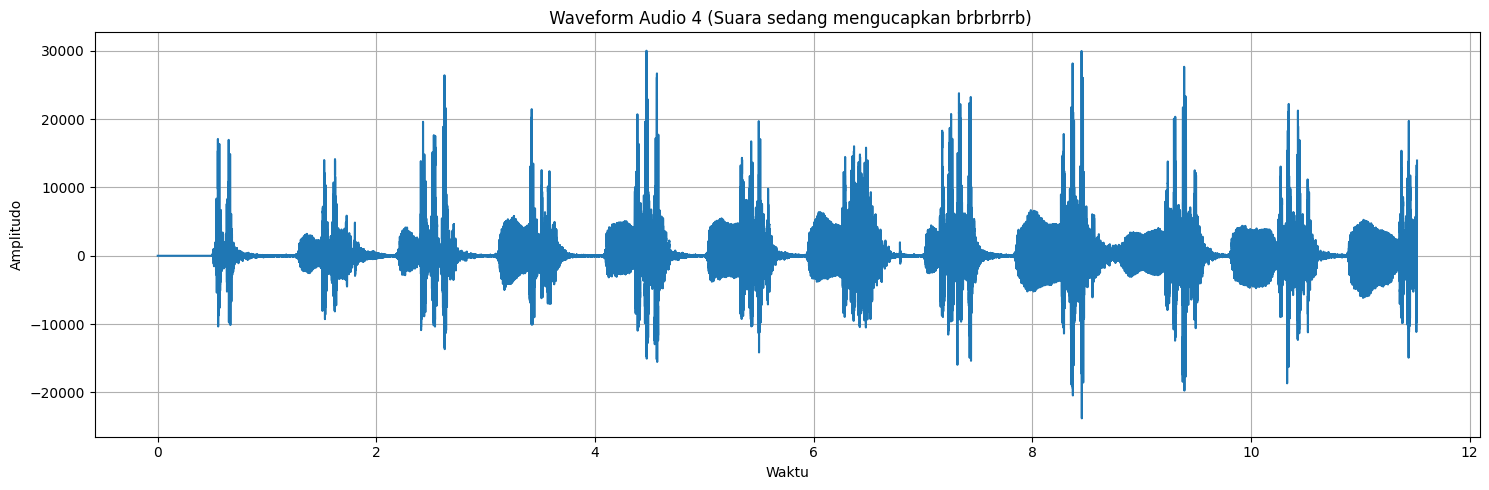

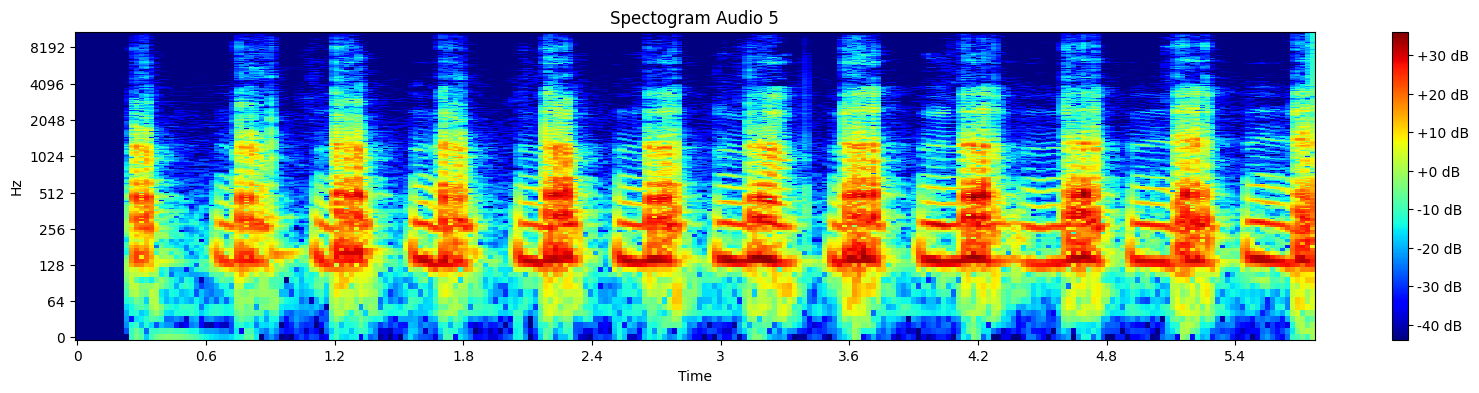

In [11]:
file_path = os.path.join(os.getcwd(), 'audio', 'Audio5.wav')

with wave.open(file_path, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_data = np.frombuffer(frames, dtype='int16')
    sampling_rate = wav_file.getframerate()
    panjang_audio_sampel = len(sound_data)
    panjang_audio_detik = panjang_audio_sampel / sampling_rate

time_axis = np.linspace(0, panjang_audio_detik, panjang_audio_sampel)
plt.figure(figsize=(15, 5))
plt.plot(time_axis, sound_data)
plt.title(" Waveform Audio 4 (Suara sedang mengucapkan brbrbrrb)")
plt.xlabel("Waktu")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.tight_layout()
plt.show()

data_audio, sr = librosa.load(file_path)
S = librosa.stft(data_audio)
S_db = librosa.amplitude_to_db(np.abs(S))

plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectogram Audio 5")
plt.show()

Analisa Perbedaan Visualisasi Audio 5

1. Untuk visualisasi waveform pada audio 5 terlihat puncak amplitudo yang berbeda-berbeda dikarenakan audionya yang naik turun.

2. Pada visualisasi spectogram dapat dilihat untuk intensitas suara atau dB sangat merata dan tidak terlihat begitu jauh walaupun terpotong-terpotong

## Soal Nomor 2

In [12]:
from pydub import AudioSegment
from pydub.playback import play

# Muat file audio dari jalur tertentu
file_path = os.path.join(os.getcwd(), 'audio', 'Audio5.wav')
audio = AudioSegment.from_file(file_path)

# Fungsi untuk menerapkan fading logaritmik
def logarithmic_fade(audio, fade_in=True, duration_ms=10000):
    faded_audio = audio[:]
    steps = duration_ms // 10
    start_dB = -100.0 if fade_in else 0.0
    end_dB = 0.0 if fade_in else -100.0
 
    for i in range(steps):
        volume_dB = start_dB + (end_dB - start_dB) * (1 - np.log10(i + 1)) / np.log1
        segment = audio[i * 10:(i + 1) * 10]
        faded_segment = segment + volume_dB
        faded_audio = faded_audio.overlay(faded_segment, position=i * 10)
    return faded_audio

# Terapkan fading logaritmik
faded_in_audio = logarithmic_fade(audio, fade_in=True, duration_ms=10000)
faded_out_audio = logarithmic_fade(audio, fade_in=False, duration_ms=10000)

# Tentukan jalur direktori untuk menyimpan file output
output_dir = os.path.join(os.getcwd(), 'output')

if not os.path.exists(output_dir):
    os.makedirs(output_dir) # Buat folder jika belum ada

# Tentukan jalur file untuk disimpan
faded_in_file_path = os.path.join(output_dir, 'faded_in_audio.wav')
faded_out_file_path = os.path.join(output_dir, 'faded_out_audio.wav')

# Simpan file audio yang sudah difade
faded_in_audio.export(faded_in_file_path, format="wav")
faded_out_audio.export(faded_out_file_path, format="wav")

# Konfirmasi bahwa file telah disimpan
print(f"File 'faded in' audio telah disimpan di: {faded_in_file_path}")
print(f"File 'faded out' audio telah disimpan di: {faded_out_file_path}")

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


AttributeError: module 'numpy' has no attribute 'log1'